# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [6]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.867754,46.046219,5471640,11521454.69
1,11020,21.524817,46.214336,5368440,11526178.91
2,11030,21.820458,38.412082,4959790,8731066.25
3,11040,22.150334,44.717847,5139830,10376463.41
4,11050,22.810568,50.043326,5020720,11014786.16


In [7]:
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business.head()

In [8]:
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people.head()

In [9]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [10]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [11]:
# df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [12]:
# df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [13]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,11521454.69
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,11526178.91
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8731066.25
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,10376463.41
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,11014786.16


In [14]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합),0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
총 이동 시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


In [15]:
# (예시1) 정류장 수와 승차 총 승객수는 관계가 있다.

# H0 : 정류장 수와 승차 총 승객수는 연관이 없다.

# H1 : 정류장 수와 승차 총 승객수는 연관이 있다.

import scipy.stats as spst
spst.pearsonr(df['정류장수'],df['승차총승객수'])

# 강한 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 정류장수와 승차총승객수는 상관관계가 있다?


(0.5666813370974585, 0.003141977397117322)

In [16]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1'])

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,11526178.91,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9509691.96,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,11630903.18,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.437297,6543820,29182496.02,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,11521454.69,0.638150
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.735699,94.938240,6234190,22997744.29,0.735588
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8731066.25,0.770887
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,22.411314,46.134844,4952990,10195984.99,0.777693
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,23.209394,49.140477,4383860,9281800.65,0.795676
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.745571,61.736901,5525180,15686297.00,0.810122


In [17]:
# (예시2) 노선 수와 총 이동시간은 관계가 있다.

# H0 : 노선 수와 총 이동시간은 연관이 없다.

# H1 : 노선 수와 총 이동시간은 연관이 있다.

spst.pearsonr(df['노선수'],df['총 이동 시간'])

# 중간 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 노선수와 총 이동 시간은 상관관계가 있다?

(0.3605000532735534, 0.07667781622760951)

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

    ? 정해진게 없나요? - 네 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다


    ? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다


    ? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (조당 최소 3개) 
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

#### 가설 1
- 이동시간이 짧을수록 정류장 수가 많다

#### 가설 2
- 이동시간이 짧을수록 노선 수가 많다

#### 가설 3
- 승하차총승객 수가 많으면 인구이동(합)도 많다
- 새 변수 '승하차총승객' 생성 (new_df['승하차총승객'] = new_df['승차총승객수'] + new_df['하차총승객수'])

## 2.단변량 분석 
(조별로 3개 정도의 변수만 진행해주세요)

+ 변수의 의미  

+ 숫자? 범주?

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용 정리  

+ 추가 분석해볼 사항 도출

#### 변수선정
- 평균이동시간(분)
- 정류장수
- 노선수
- 이동인구(합)
- 승하차총승객

In [18]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬에서 사용하신다면 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# AIDU에서 사용하신다면 나눔 고딕

# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

# scipy
import scipy.stats as spst

In [19]:
# 새 변수 승하차총승객 생성
df['승하차총승객'] = df['승차총승객수'] + df['하차총승객수']

### 1) 기초통계량 및 NaN 확인

In [31]:
#기초통계량

print(df['평균 이동 시간(분)'].describe())
print("---"*30)
print(df['정류장수'].describe())
print("---"*30)
print(df['노선수'].describe())
print("---"*30)
print(df['이동인구(합)'].describe())
print("---"*30)
print(df['승하차총승객'].describe())

count    25.000000
mean     23.378500
std       1.363460
min      21.524817
25%      22.150334
50%      23.162536
75%      24.355289
max      25.931701
Name: 평균 이동 시간(분), dtype: float64
------------------------------------------------------------------------------------------
count     25.000000
mean     424.600000
std      106.279506
min      178.000000
25%      349.000000
50%      435.000000
75%      499.000000
max      602.000000
Name: 정류장수, dtype: float64
------------------------------------------------------------------------------------------
count     25.000000
mean      72.920000
std       23.808122
min       21.000000
25%       56.000000
50%       71.000000
75%       94.000000
max      107.000000
Name: 노선수, dtype: float64
------------------------------------------------------------------------------------------
count     25.000000
mean      54.379857
std       17.059207
min       32.821422
25%       44.717847
50%       48.931749
75%       60.518839
max      104.437297
Name: 이동

In [27]:
# 이동시간, 정류장수, 노선수, 인구이동, 새변수
# NaN 있는지 확인

print(df['평균 이동 시간(분)'].isna().sum())
print(df['정류장수'].isna().sum())
print(df['노선수'].isna().sum())
print(df['이동인구(합)'].isna().sum())
print(df['승하차총승객'].isna().sum())

0
0
0
0
0


### 2) 시각화 (historgam, boxplot, kdeplot)

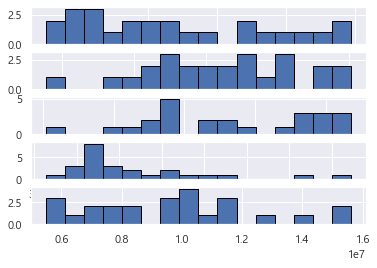

In [32]:
# 분포 그래프 (hist)

plt.subplot(5,1,1)
plt.hist(df['평균 이동 시간(분)'], bins=16, edgecolor='black')
plt.subplot(5,1,2)
plt.hist(df['정류장수'], bins=16, edgecolor='black')
plt.subplot(5,1,3)
plt.hist(df['노선수'], bins=16, edgecolor='black')
plt.subplot(5,1,4)
plt.hist(df['이동인구(합)'], bins=16, edgecolor='black')
plt.subplot(5,1,5)
plt.hist(df['승하차총승객'], bins=16, edgecolor='black')
plt.show()

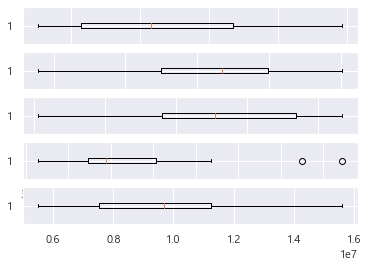

In [33]:
# 분포 그래프 (boxplot)

plt.subplot(5,1,1)
plt.boxplot(df['평균 이동 시간(분)'], vert = False)
plt.subplot(5,1,2)
plt.boxplot(df['정류장수'], vert = False)
plt.subplot(5,1,3)
plt.boxplot(df['노선수'], vert = False)
plt.subplot(5,1,4)
plt.boxplot(df['이동인구(합)'], vert = False)
plt.subplot(5,1,5)
plt.boxplot(df['승하차총승객'], vert = False)
plt.show()

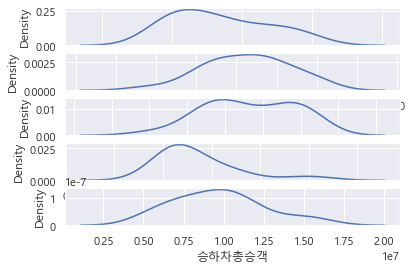

In [34]:
# 분포 그래프 (kdeplot)

plt.subplot(5,1,1)
sns.kdeplot(df['평균 이동 시간(분)'])
plt.subplot(5,1,2)
sns.kdeplot(df['정류장수'])
plt.subplot(5,1,3)
sns.kdeplot(df['노선수'])
plt.subplot(5,1,4)
sns.kdeplot(df['이동인구(합)'])
plt.subplot(5,1,5)
sns.kdeplot(df['승하차총승객'])
plt.show()

### 3) 파악한 내용 및 추가 분석점

- 이동인구합은 평균 54 기준으로 대체로 분포
- 노선수에 outlier존재
- 정류장수 노선수 비교시 대체로 그래프 형상은 유사(peak위치 유사)하나 노선수는 2개로 peak가 분리되어 나타남
- 평균 이동 시간(분)과 이동인구(합)은 peak 위치가 비슷

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [22]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,비율1,승하차총승객
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874,0.003939,0.441601
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605,0.334779,0.573023
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197,-0.560349,0.659671
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742,-0.542806,0.999165
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686,-0.527274,0.999140
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692,-0.700851,0.537242
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831,-0.670886,0.551699
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281,0.380899,-0.140961
이동인구(합),0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787,-0.060056,0.467282
총 이동 시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128,-0.222273,0.569043


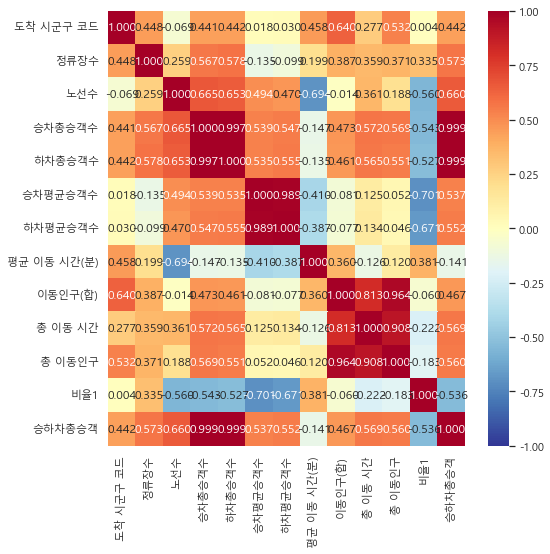

In [35]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()


### 1) 평균 이동 시간 - 노선 수

(-0.6935652960828838, 0.00012083974762338667)


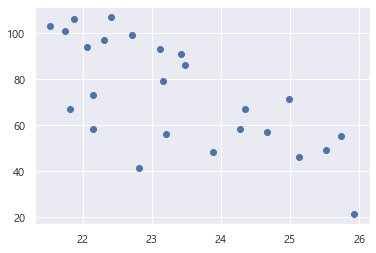

In [48]:
# 평균 이동 시간(분)_x - 노선수
print(spst.pearsonr(df['평균 이동 시간(분)'], df['노선수']))
# scatter
plt.scatter(df['평균 이동 시간(분)'], df['노선수'])
plt.show()

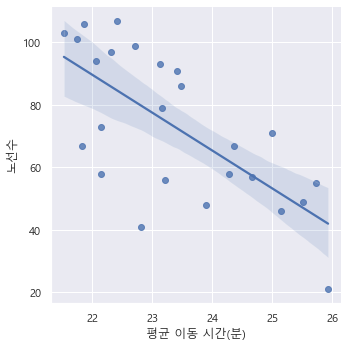

In [47]:
# lmplot
sns.lmplot(x='평균 이동 시간(분)', y='노선수', data=df)
plt.show()

### 2) 평균 이동 시간(분) - 정류장 수

(0.19946564628135277, 0.33911174723621357)


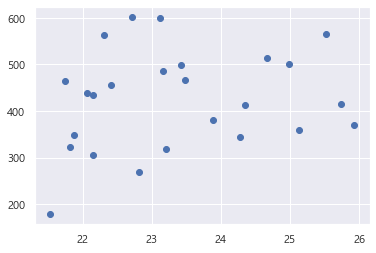

In [43]:
# 평균 이동 시간(분)_x - 정류장수
print(spst.pearsonr(df['평균 이동 시간(분)'], df['정류장수']))

#
plt.scatter(df['평균 이동 시간(분)'], df['정류장수'])
plt.show()

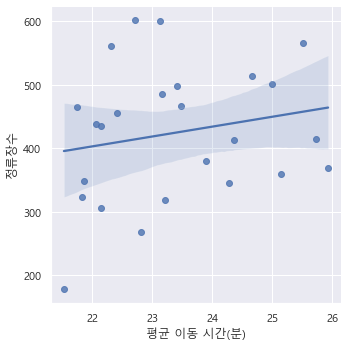

In [41]:
# lmplot
sns.lmplot(x='평균 이동 시간(분)', y='정류장수', data=df)
plt.show()

### 3) 이동인구(합) - 승하차 총승객

(0.467282272601809, 0.018514465071440757)


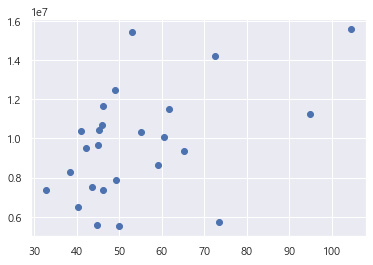

In [53]:
# '이동인구(합)' - 승하차총승객'
print(spst.pearsonr(df['이동인구(합)'], df['승하차총승객']))
plt.scatter(df['이동인구(합)'], df['승하차총승객'])
plt.show()

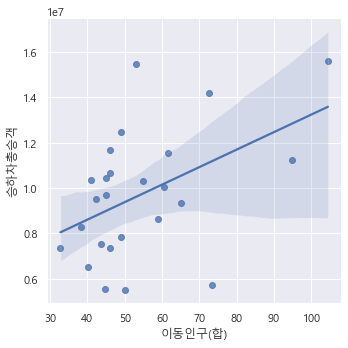

In [54]:
# lmplot
sns.lmplot(x='이동인구(합)', y='승하차총승객', data=df)
plt.show()

## 4.관계 정리

1. 평균이동시간-노선수
- PearsonRResult(statistic=-0.6935652960828838, pvalue=0.00012083974762338667)

2. 평균이동시간-정류장수
- PearsonRResult(statistic=0.19946564628135277, pvalue=0.33911174723621357)

3. 이동인구합-승하차 총승객
- PearsonRResult(statistic=0.4672822726018228, pvalue=0.018514465071436784)


-> 가설 1 채택

### 1) 강한 관계의 변수

* '평균 이동 시간(분)' - 노선수
* '이동인구(합)' - 승하차총승객'

### 2) 약한 관계의 변수

* '평균 이동 시간(분)' - 정류장수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

In [59]:
df.sort_values(by='평균 이동 시간(분)',ascending=False)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,비율1,승하차총승객
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.931701,73.450836,5082380,14395702.78,1.276793,5720559
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.735699,94.938240,6234190,22997744.29,0.735588,11245230
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.520396,65.157973,5486630,14008312.51,1.209122,9333911
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.138206,40.194257,4086140,6533455.94,1.086461,6515726
11,11120,은평구,501,71,5201660,5122499,106.395173,104.776007,24.993078,55.018153,4748160,10452293.76,0.963154,10324159
10,11110,노원구,514,57,4353295,4292724,88.476211,87.245168,24.662041,59.026631,5235480,12530704.48,1.180715,8646019
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.216319,4458260,7727739.40,0.855926,9496964
17,11180,금천구,345,58,3776658,3581930,123.098370,116.751304,24.283819,32.821422,3789660,5122012.58,0.913506,7358588
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.887741,43.639157,4635870,8469007.57,1.001967,7533464
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,11630903.18,0.608687,15448295


- 상관계수가 제일 높은 1번 가설 채택
- 평균이동시간-정류장수와 평균이동시간-노선수가 유사한 수준의 상관관계를 보일 것으로 예상했으나 후자의 상관 계수가 더 높게 관측
- 동일 거리 대비 정류장 더 많다면 버스를 덜타는 경우가 있을 수 있음
- 노선은 여러개 환승 가능
- 노선수가 적을수록 이동시간이 짧을 수 있음

- 최종적으로 이동시간이 많은 구에 추가적인 노선수가 요구됨
- top 3 : 강동구, 송파구, 강서구 순